In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os

In [4]:
IMG_SIZE = (80,80)
channels = 1
char_path = r'train/'

In [5]:
# file_names and count
char_dict = {}
for char in os.listdir(char_path):
    char_names = char.split('_')[1]
    char_dict[char_names] = len(os.listdir(os.path.join(char_path,char)))

char_dict

{'Adriana Lima': 213,
 'Alex Lawther': 152,
 'Alexandra Daddario': 225,
 'Alvaro Morte': 139,
 'alycia dabnem carey': 211,
 'Amanda Crew': 117,
 'amber heard': 218,
 'Andy Samberg': 196,
 'Anne Hathaway': 203,
 'Anthony Mackie': 124,
 'Avril Lavigne': 162,
 'barack obama': 119,
 'barbara palvin': 197,
 'Ben Affleck': 126,
 'Bill Gates': 122,
 'Bobby Morley': 138,
 'Brenton Thwaites': 209,
 'Brian J. Smith': 102,
 'Brie Larson': 169,
 'camila mendes': 162,
 'Chris Evans': 166,
 'Chris Hemsworth': 159,
 'Chris Pratt': 176,
 'Christian Bale': 154,
 'Cristiano Ronaldo': 98,
 'Danielle Panabaker': 181,
 'Dominic Purcell': 146,
 'Dwayne Johnson': 141,
 'Eliza Taylor': 162,
 'Elizabeth Lail': 158,
 'elizabeth olsen': 221,
 'ellen page': 188,
 'elon musk': 135,
 'Emilia Clarke': 210,
 'Emma Stone': 139,
 'Emma Watson': 211,
 'gal gadot': 199,
 'grant gustin': 183,
 'Gwyneth Paltrow': 187,
 'Henry Cavil': 195,
 'Hugh Jackman': 179,
 'Inbar Lavi': 127,
 'Irina Shayk': 156,
 'Jake Mcdorman': 159,

In [6]:
# Total characters/people list
characters = []
count = 0
for i in char_dict:
    characters.append(i)
    count +=1
    
characters

['Adriana Lima',
 'Alex Lawther',
 'Alexandra Daddario',
 'Alvaro Morte',
 'alycia dabnem carey',
 'Amanda Crew',
 'amber heard',
 'Andy Samberg',
 'Anne Hathaway',
 'Anthony Mackie',
 'Avril Lavigne',
 'barack obama',
 'barbara palvin',
 'Ben Affleck',
 'Bill Gates',
 'Bobby Morley',
 'Brenton Thwaites',
 'Brian J. Smith',
 'Brie Larson',
 'camila mendes',
 'Chris Evans',
 'Chris Hemsworth',
 'Chris Pratt',
 'Christian Bale',
 'Cristiano Ronaldo',
 'Danielle Panabaker',
 'Dominic Purcell',
 'Dwayne Johnson',
 'Eliza Taylor',
 'Elizabeth Lail',
 'elizabeth olsen',
 'ellen page',
 'elon musk',
 'Emilia Clarke',
 'Emma Stone',
 'Emma Watson',
 'gal gadot',
 'grant gustin',
 'Gwyneth Paltrow',
 'Henry Cavil',
 'Hugh Jackman',
 'Inbar Lavi',
 'Irina Shayk',
 'Jake Mcdorman',
 'Jason Momoa',
 'jeff bezos',
 'Jennifer Lawrence',
 'Jeremy Renner',
 'Jessica Barden',
 'Jimmy Fallon',
 'Johnny Depp',
 'Josh Radnor',
 'Katharine Mcphee',
 'Katherine Langford',
 'Keanu Reeves',
 'kiernen shipka',

In [7]:
# Loading the Haar cascade classifier from the 'haar_faces.xml' file
haar_cascade = cv.CascadeClassifier('haar_faces.xml')

In [12]:
features = []
labels = []

def create_train():
    for person in characters:   # Iterate over each person (character) in the dataset
        path = os.path.join(char_path, f'pins_{person}')
        label = characters.index(person)     # Assign a unique label to the current person

        for img in os.listdir(path):
            img_path = os.path.join(path, img)

            img_array = cv.imread(img_path)
            gray = cv.cvtColor(img_array, cv.COLOR_BGR2GRAY)

            faces_rect = haar_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4)    # Detect faces in the grayscale image using the Haar cascade classifier

            for (x,y,w,h) in faces_rect:    # Extract the region of interest (ROI) containing the face
                faces_roi = gray[y:y+h, x:x+w]
                features.append(faces_roi)
                labels.append(label)
            
create_train()

In [13]:
print(f'Length of the features = {len(features)}')
print(f'Length of the labels = {len(labels)}')

Length of the features = 15741
Length of the labels = 15741


In [14]:
features = np.array(features, dtype='object')
labels = np.array(labels)

In [15]:
# Creating an LBPH (Local Binary Pattern Histogram) face recognizer
face_recognizer = cv.face.LBPHFaceRecognizer_create()
face_recognizer.train(features, labels)

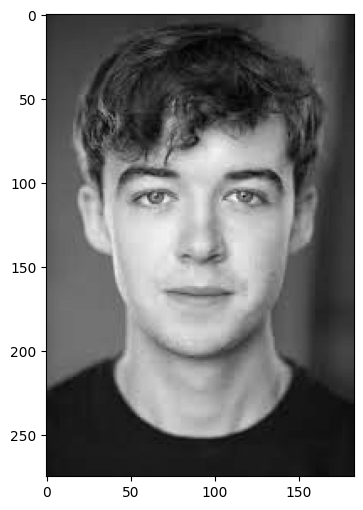

In [68]:
# Displaying Validation image
img = cv.imread(r'C:\Users\bkhan\Desktop\Humber Course\Winter Semester\Image Processing & Computer Vision\Midterm Project\Face_detection\val\pins_Alex Lawther\Alex Lawther5.jpg')
img_RGB = cv.cvtColor(img, cv.COLOR_BGR2RGB)
gray = cv.cvtColor(img_RGB, cv.COLOR_BGR2GRAY)
plt.figure(figsize=(12,6))
plt.imshow(gray, cmap = 'gray')
plt.show()

Label = Alex Lawther with a confidence of 66.76433996906732


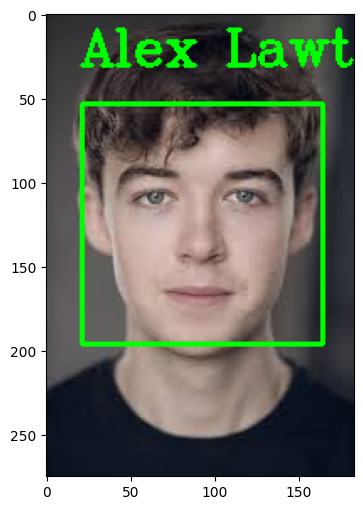

In [69]:
# Validation
faces_rect = haar_cascade.detectMultiScale(gray, 1.1, 4)

for (x,y,w,h) in faces_rect:
    faces_roi = gray[y:y+h, x:x+w]

    label, confidence = face_recognizer.predict(faces_roi)          # Using face recognizer to predict the label and confidence for the face
    print(f'Label = {characters[label]} with a confidence of {confidence}')

    cv.putText(img_RGB, str(characters[label]), (20,30), cv.FONT_HERSHEY_COMPLEX, 1.0, (0,255,0), thickness=2)
    cv.rectangle(img_RGB, (x,y), (x+w, y+h), (0,255,0), thickness=2)

plt.figure(figsize=(12,6))
plt.imshow(img_RGB, cmap='gray')
plt.show()


In [37]:
np.save('features.npy', features)
np.save('labels.npy', labels)

In [38]:
face_recognizer.save('face_trained.yml')